In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Load the data from the Excel file
file_path = 'data.xlsx'

doctors_df = pd.read_excel(file_path, sheet_name='doctorsinGermany')
retirement_age_df = pd.read_excel(file_path, sheet_name='MeanRetirementAge')
labour_force_df = pd.read_excel(file_path, sheet_name='LabourForce')
population_df = pd.read_excel(file_path, sheet_name='Population')
population_projection_df = pd.read_excel(file_path, sheet_name='populatioprojection_Agegroup')
age_distribution_df = pd.read_excel(file_path, sheet_name='AgeDistribution')
medical_graduates_df = pd.read_excel(file_path, sheet_name='medicalgraduates')

In [3]:
doctors_df.head()

,Year,Practicing Doctors,Doctors Without medical activity
0,2023,428500,140300
1,2022,421300,136200
2,2021,416100,132200
3,2020,409100,127800
4,2019,402100,123600


In [4]:
retirement_age_df

,Year,Standard Age,Insured for 35 years,Insured for 45 years,Severely Disabled,Unemployed,Women,Mine Workers
0,1992,65.000,63.000,63.000,60.000,60.000,60.000,60.000
1,1993,65.000,63.000,63.000,60.000,60.000,60.000,60.000
2,1994,65.000,63.000,63.000,60.000,60.000,60.000,60.000
3,1995,65.000,63.000,63.000,60.000,60.000,60.000,60.000
4,1996,65.000,63.000,63.000,60.000,60.000,60.000,60.000
5,1997,65.000,63.000,63.000,60.000,60.292,60.000,60.000
6,1998,65.000,63.000,63.000,60.000,60.792,60.000,60.000
7,1999,65.000,63.000,63.000,60.000,61.292,60.000,60.000
8,2000,65.000,63.292,63.292,60.292,61.792,60.292,60.000
9,2001,65.000,63.792,63.792,60.792,62.292,60.792,60.000


In [5]:
labour_force_df

,Year,Labour force,Persons in employment (national concept),Persons in employment (domestic concept),Self-employed,Employees,"Agriculture, forestry and fishing",Production industry (incl. construction),Services,Unemployed,Unemployment rate (%),Employees subject to social insurance contributions,Persons exclusively in marginal employment,Registered unemployed,Rate of registered unemployment (%),Reported job vacancies
0,2013,44309000,42285000,42350000,4495000,37855000,641000,10434000,31275000,2024000,0.046,29616000,5066000,2950000,0.069,457000
1,2022,46800000,45457000,45596000,3909000,41687000,557000,10738000,34301000,1343000,0.029,34445000,4164000,2418000,0.053,845000
2,2023,47119000,45785000,45933000,3879000,42054000,554000,10780000,34599000,1334000,0.028,34709000,4266000,2609000,0.057,761000


In [6]:
population_df

,Year,Total Population
0,1960,72814900
1,1961,73377632
2,1962,74025784
3,1963,74714353
4,1964,75318337
...,...,...
60,2020,83160871
61,2021,83196078
62,2022,83797985
63,2023,84482267


In [7]:
population_projection_df

,Year,Total Population,Population (Under 20yrs),Population (20-66yrs),Population (67 yrs+)
0,2021,83200000,15400000,51400000,16400000.0
1,2030,85140000,16440000,49960000,18720000.0
2,2040,84780000,15980000,48000000,20800000.0
3,2050,83840000,15560000,47860000,20400000.0
4,2060,82700000,15560000,46440000,20740000.0
5,2070,82260000,15400000,45740000,21140000.0


In [8]:
age_distribution_df

,Year,Total number,under 20(%),20 to 40(%),40 to 60(%),60 to 80(%),80 to 100(%),100 and more(%)
0,2023,84669326,0.188,0.245,0.268,0.226,0.072,0
1,2022,84358845,0.188,0.245,0.273,0.222,0.072,0
2,2021,83237124,0.185,0.244,0.277,0.220,0.073,0
3,2020,83155031,0.184,0.245,0.281,0.218,0.071,0
4,2019,83166711,0.184,0.246,0.284,0.217,0.068,0
5,2018,83019213,0.184,0.246,0.288,0.217,0.065,0
6,2017,82792351,0.184,0.246,0.291,0.217,0.062,0
7,2016,82521653,0.184,0.245,0.294,0.216,0.060,0
8,2016,82175684,0.183,0.245,0.298,0.216,0.057,0
9,2014,81197537,0.182,0.241,0.303,0.218,0.056,0


In [9]:
medical_graduates_df

,Year,Number of employees
0,2021,10320
1,2020,10007
2,2019,10234
3,2018,9563
4,2017,9928
5,2016,9647
6,2015,9215
7,2014,9599
8,2013,9801
9,2012,9587


In [38]:
#Seeing that the Year column is an integer, lets convert it to a date field
medical_graduates_df['Year'] = pd.to_datetime(medical_graduates_df['Year'], format='%Y')

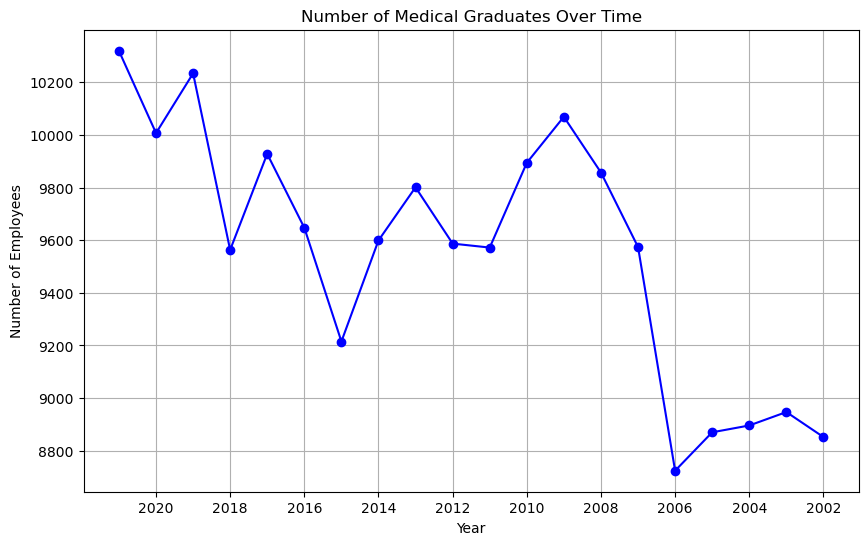

In [39]:
# Create the plot for medical graduates
plt.figure(figsize=(10, 6))
plt.plot(medical_graduates_df['Year'], medical_graduates_df['Number of employees'], marker='o', color='blue')

# Adding titles and labels
plt.title('Number of Medical Graduates Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.grid(True)

# Reverse the x-axis to show the earliest year on the left
plt.gca().invert_xaxis()

# Show the plot
plt.show()


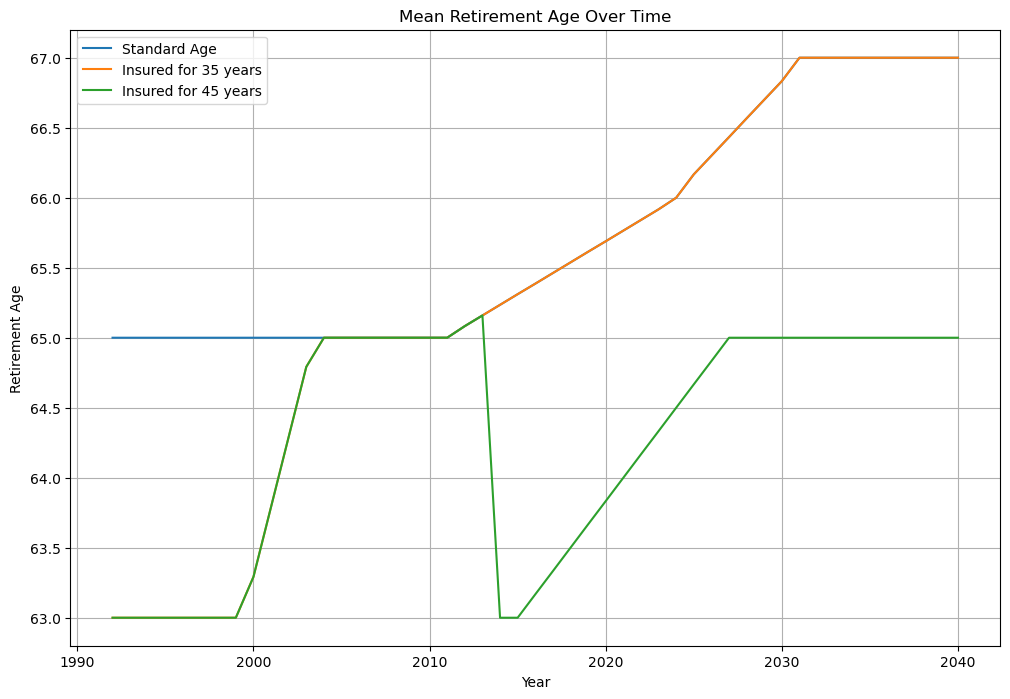

In [33]:
# Plotting the Mean Retirement Age data
plt.figure(figsize=(12, 8))

# Plot each column
plt.plot(retirement_age_df['Year'], retirement_age_df['Standard Age'], label='Standard Age')
plt.plot(retirement_age_df['Year'], retirement_age_df['Insured for 35 years'], label='Insured for 35 years')
plt.plot(retirement_age_df['Year'], retirement_age_df['Insured for 45 years'], label='Insured for 45 years')

# Adding titles and labels
plt.title('Mean Retirement Age Over Time')
plt.xlabel('Year')
plt.ylabel('Retirement Age')
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()


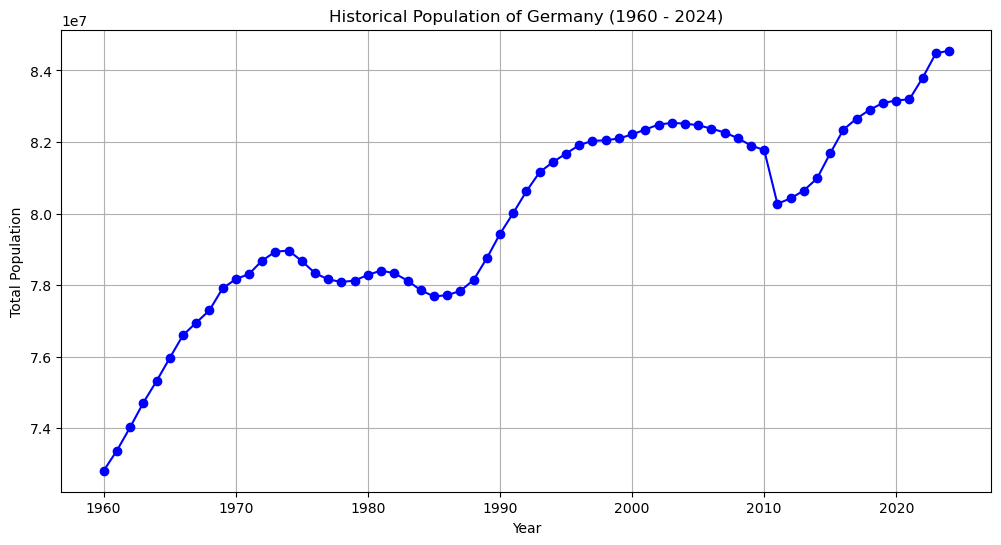

In [25]:
# Plotting the total Population of Germany

plt.figure(figsize=(12, 6))
plt.plot(population_df['Year'], population_df['Total Population'], marker='o', linestyle='-', color='b')
plt.title('Historical Population of Germany (1960 - 2024)')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True)
plt.show()


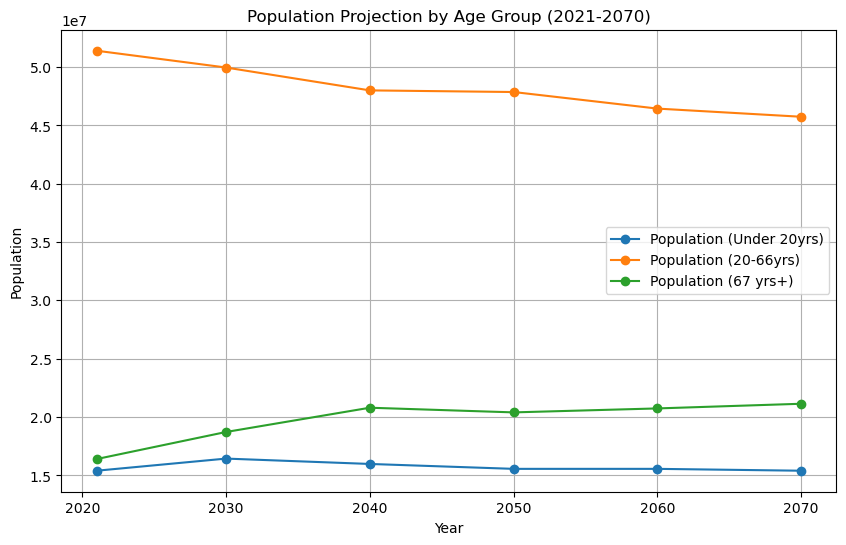

In [28]:
# Plotting the Population Projection of Germany

plt.figure(figsize=(10, 6))

plt.plot(population_projection_df['Year'], population_projection_df['Population (Under 20yrs)'], marker='o', label='Population (Under 20yrs)')
plt.plot(population_projection_df['Year'], population_projection_df['Population (20-66yrs)'], marker='o', label='Population (20-66yrs)')
plt.plot(population_projection_df['Year'], population_projection_df['Population (67 yrs+)'], marker='o', label='Population (67 yrs+)')

plt.title('Population Projection by Age Group (2021-2070)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Step 1: Project the population growth and aging trends

# Calculate the growth rates for each age group
population_projection_df['Growth Rate (Under 20yrs)'] = population_projection_df['Population (Under 20yrs)'].pct_change()
population_projection_df['Growth Rate (20-66yrs)'] = population_projection_df['Population (20-66yrs)'].pct_change()
population_projection_df['Growth Rate (67 yrs+)'] = population_projection_df['Population (67 yrs+)'].pct_change()

print("Population Growth and Aging Trends:")

Population Growth and Aging Trends:


In [11]:
population_projection_df

,Year,Total Population,Population (Under 20yrs),Population (20-66yrs),Population (67 yrs+),Growth Rate (Under 20yrs),Growth Rate (20-66yrs),Growth Rate (67 yrs+)
0,2021,83200000,15400000,51400000,16400000.0,NaN,NaN,NaN
1,2030,85140000,16440000,49960000,18720000.0,0.067532,-0.028016,0.141463
2,2040,84780000,15980000,48000000,20800000.0,-0.027981,-0.039231,0.111111
3,2050,83840000,15560000,47860000,20400000.0,-0.026283,-0.002917,-0.019231
4,2060,82700000,15560000,46440000,20740000.0,0.000000,-0.029670,0.016667
5,2070,82260000,15400000,45740000,21140000.0,-0.010283,-0.015073,0.019286


In [12]:
# Step 2: Estimate the supply of doctors

# Prepare the data for linear regression
X = doctors_df['Year'].values.reshape(-1, 1)
y = doctors_df['Practicing Doctors'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Project the number of doctors for the next 20 years
future_years = np.arange(2024, 2044).reshape(-1, 1)
projected_doctors = model.predict(future_years)

# Display the projected number of doctors
projected_doctors_df = pd.DataFrame({'Year': future_years.flatten(), 'Projected Practicing Doctors': projected_doctors})
projected_doctors_df

,Year,Projected Practicing Doctors
0,2024,423705.866145
1,2025,429231.051462
2,2026,434756.236779
3,2027,440281.422096
4,2028,445806.607413
5,2029,451331.792730
6,2030,456856.978046
7,2031,462382.163363
8,2032,467907.348680
9,2033,473432.533997


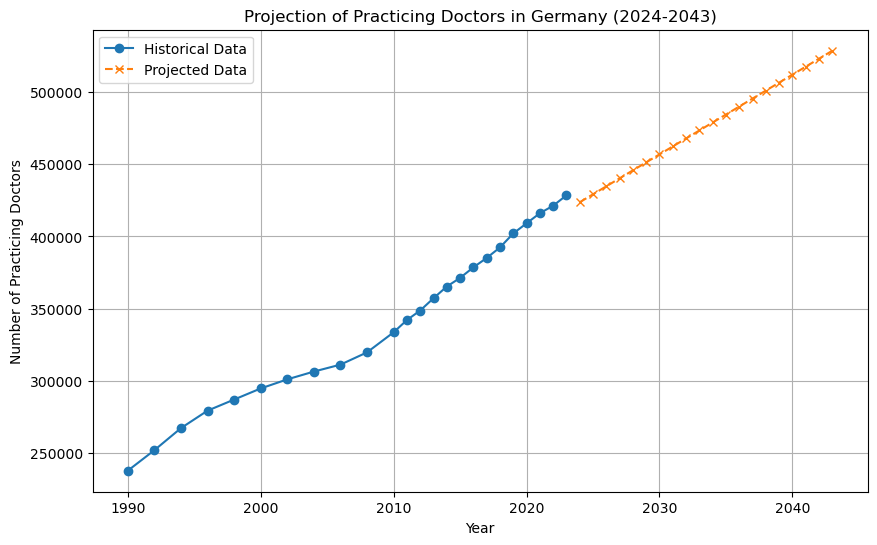

In [13]:
# Plot the projection
plt.figure(figsize=(10, 6))
plt.plot(doctors_df['Year'], doctors_df['Practicing Doctors'], label='Historical Data', marker='o')
plt.plot(projected_doctors_df['Year'], projected_doctors_df['Projected Practicing Doctors'], label='Projected Data', linestyle='--', marker='x')
plt.xlabel('Year')
plt.ylabel('Number of Practicing Doctors')
plt.title('Projection of Practicing Doctors in Germany (2024-2043)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Step 3: Forecast the demand for doctors based on population aging

# Interpolate population projections for each year
years = range(2021, 2051)
total_population = np.interp(years, population_projection_df['Year'], population_projection_df['Total Population'])
population_67_plus = np.interp(years, population_projection_df['Year'], population_projection_df['Population (67 yrs+)'])

# Calculate the ratio of doctors to population, focusing on the aging population
current_doctor_ratio = projected_doctors_df['Projected Practicing Doctors'].iloc[-1] / population_projection_df['Total Population'].iloc[0]
current_elderly_ratio = population_projection_df['Population (67 yrs+)'].iloc[0] / population_projection_df['Total Population'].iloc[0]

# Assume that the demand for doctors increases proportionally with the increase in the elderly population ratio
demand_projection = []
for i, year in enumerate(years):
    elderly_ratio = population_67_plus[i] / total_population[i]
    demand_factor = elderly_ratio / current_elderly_ratio
    required_doctors = total_population[i] * current_doctor_ratio * demand_factor
    demand_projection.append(required_doctors)

demand_projection_df = pd.DataFrame({
    'Year': years,
    'Projected Demand': demand_projection
})

print("\
Projected demand for doctors:")
print(demand_projection_df)

Projected demand for doctors:
    Year  Projected Demand
0   2021     528684.387166
1   2022     536994.331462
2   2023     545304.275759
3   2024     553614.220056
4   2025     561924.164353
5   2026     570234.108650
6   2027     578544.052947
7   2028     586853.997244
8   2029     595163.941541
9   2030     603473.885838
10  2031     610179.151236
11  2032     616884.416634
12  2033     623589.682032
13  2034     630294.947431
14  2035     637000.212829
15  2036     643705.478227
16  2037     650410.743625
17  2038     657116.009023
18  2039     663821.274422
19  2040     670526.539820
20  2041     669237.065705
21  2042     667947.591590
22  2043     666658.117475
23  2044     665368.643360
24  2045     664079.169245
25  2046     662789.695130
26  2047     661500.221015
27  2048     660210.746899
28  2049     658921.272784
29  2050     657631.798669


In [15]:
# Step 4: Calculate and visualize the doctor deficit over the next 20 years

# Merge supply and demand projections
deficit_df = pd.merge(projected_doctors_df, demand_projection_df, on='Year', how='outer')
deficit_df['Doctor Deficit'] = deficit_df['Projected Demand'] - deficit_df['Projected Practicing Doctors']

print("\
Doctor deficit projection:")
print(deficit_df)

Doctor deficit projection:
    Year  Projected Practicing Doctors  Projected Demand  Doctor Deficit
0   2024                 423705.866145     553614.220056   129908.353911
1   2025                 429231.051462     561924.164353   132693.112891
2   2026                 434756.236779     570234.108650   135477.871871
3   2027                 440281.422096     578544.052947   138262.630851
4   2028                 445806.607413     586853.997244   141047.389831
5   2029                 451331.792730     595163.941541   143832.148811
6   2030                 456856.978046     603473.885838   146616.907791
7   2031                 462382.163363     610179.151236   147796.987873
8   2032                 467907.348680     616884.416634   148977.067954
9   2033                 473432.533997     623589.682032   150157.148035
10  2034                 478957.719314     630294.947431   151337.228117
11  2035                 484482.904631     637000.212829   152517.308198
12  2036                

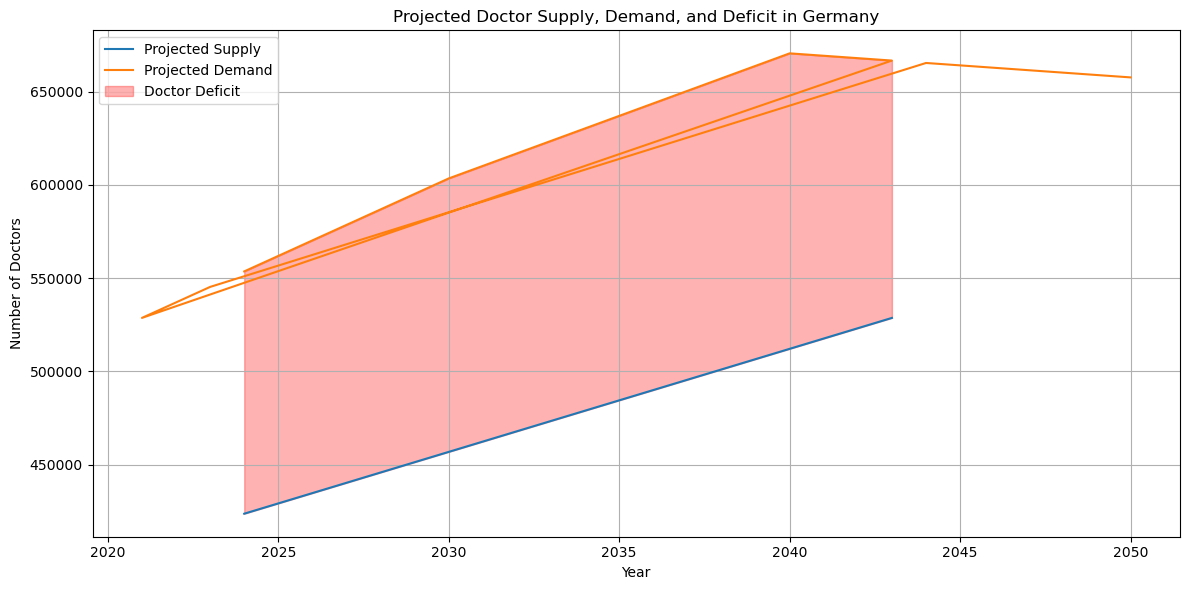

In [16]:
# Visualize the doctor deficit
plt.figure(figsize=(12, 6))
plt.plot(deficit_df['Year'], deficit_df['Projected Practicing Doctors'], label='Projected Supply')
plt.plot(deficit_df['Year'], deficit_df['Projected Demand'], label='Projected Demand')
plt.fill_between(deficit_df['Year'], deficit_df['Projected Practicing Doctors'], deficit_df['Projected Demand'], 
                 where=(deficit_df['Projected Demand'] > deficit_df['Projected Practicing Doctors']),
                 alpha=0.3, color='red', label='Doctor Deficit')
plt.title('Projected Doctor Supply, Demand, and Deficit in Germany')
plt.xlabel('Year')
plt.ylabel('Number of Doctors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()